In [2]:
import pandas as pd

# Step 1: Data Collection
data = pd.read_csv('forecasting.csv')

# Step 2: Data Preprocessing
# Assuming 'date' is in datetime format and 'price' is numeric
data['date'] = pd.to_datetime(data['Date'])
data.set_index('date', inplace=True)

# Optional: Handling missing values or outliers
# data.dropna(inplace=True)
# data = data[~data['price'].isnull()]

# Optional: Transformations (if needed)
# data['log_price'] = np.log(data['price'])


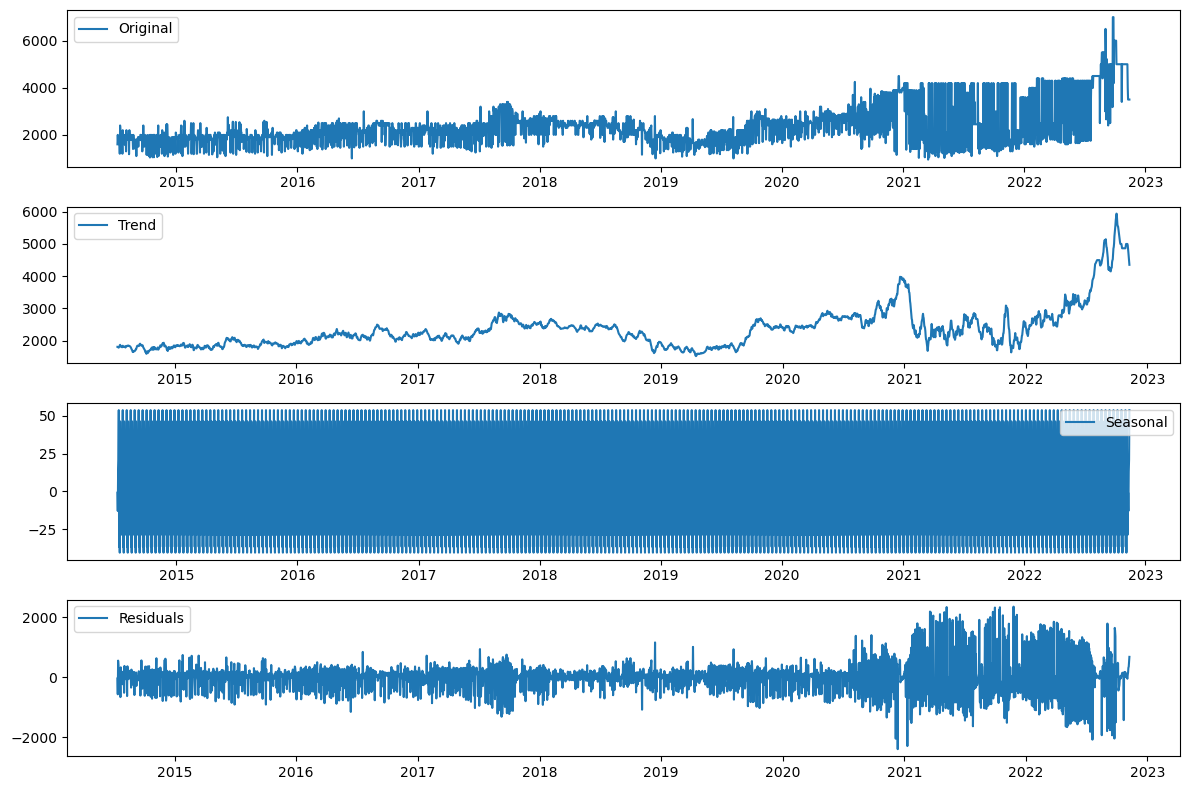

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Step 3: Time Series Decomposition
decomposition = seasonal_decompose(data['Price'], model='additive', period=12)  # Assuming monthly data (period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Step 4: Choose a Forecasting Method (ARIMA example)
model = ARIMA(data['Price'], order=(1, 1, 1))  # Example parameters, tune based on model selection
results = model.fit()

# Optional: Model summary
print(results.summary())


C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3053
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23744.173
Date:                Sun, 07 Jul 2024   AIC                          47494.346
Time:                        22:04:16   BIC                          47512.417
Sample:                    07-07-2014   HQIC                         47500.840
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1316      0.013     -9.809      0.000      -0.158      -0.105
ma.L1         -0.9050      0.006   -155.725      0.000      -0.916      -0.894
sigma2      3.347e+05   5490.388     60.965      0.0

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your data is stored in 'data' DataFrame and the model parameters are already set
order = (1, 1, 1)  # ARIMA(1, 1, 1) parameters
seasonal_order = (0, 0, 0, 0)  # Non-seasonal SARIMA, adjust if seasonality is present

# Initialize SARIMAX model
model = SARIMAX(data['Price'], order=order, seasonal_order=seasonal_order)


C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
results = model.fit()


In [10]:
# Forecasting for the next 10 years (assuming monthly data)
forecast_steps = 120  # 12 months * 10 years
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()


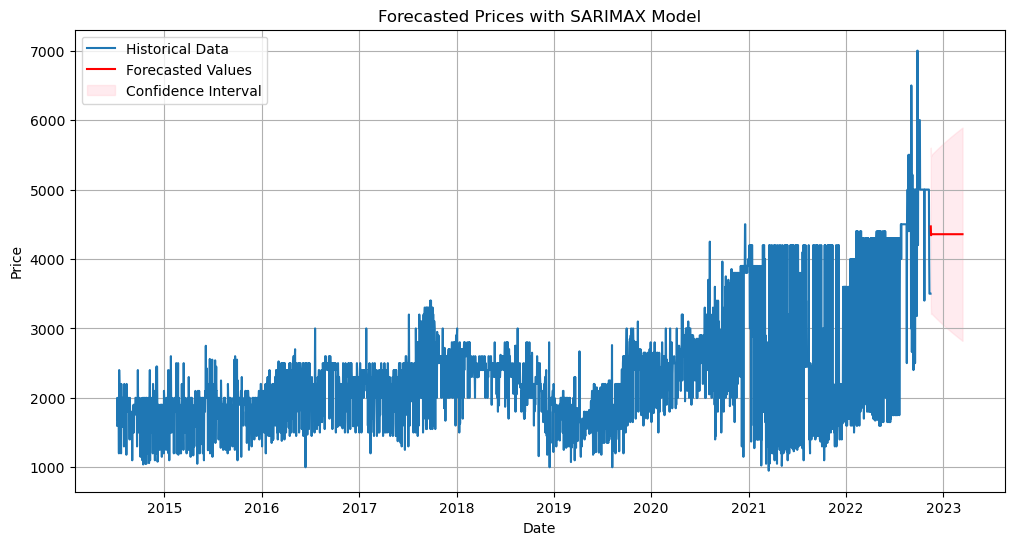

In [11]:
import matplotlib.pyplot as plt

# Plotting historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='r', label='Forecasted Values')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Forecasted Prices with SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'forecasted_data' is not defined

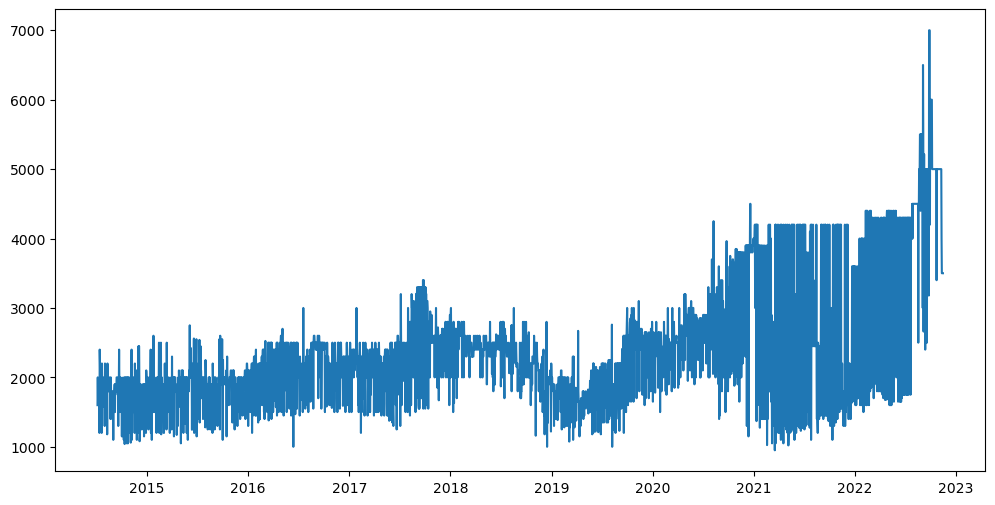

In [12]:
# Step 7: Monitor and Refine
# Monitor performance against actual data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Actual')
plt.plot(forecasted_data.index, forecasted_data, label='Forecast')
plt.legend(loc='best')
plt.title('Actual vs Forecasted Prices')
plt.show()

# Optionally, retrain or adjust model based on new data or model performance


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Step 4: Choose a Forecasting Method (ARIMA example)
model = ARIMA(data['Price'], order=(1, 1, 1))  # Example parameters, tune based on model selection
results = model.fit()

# Optional: Model summary
print(results.summary())


C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3053
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23744.173
Date:                Sun, 07 Jul 2024   AIC                          47494.346
Time:                        22:08:45   BIC                          47512.417
Sample:                    07-07-2014   HQIC                         47500.840
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1316      0.013     -9.809      0.000      -0.158      -0.105
ma.L1         -0.9050      0.006   -155.725      0.000      -0.916      -0.894
sigma2      3.347e+05   5490.388     60.965      0.0

In [16]:
# Step 4: Model Selection and Training
train_size = int(len(data) * 0.8)
train, valid = data.iloc[:train_size], data.iloc[train_size:]

# Fit the ARIMA model
model = ARIMA(train['Price'], order=(1, 1, 1))
results = model.fit()


C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Pushpa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
# Step 5: Model Validation
predictions = results.forecast(steps=len(valid))  # Forecast length same as validation set

# Calculate metrics (e.g., RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(valid['Price'], predictions))
print(f'RMSE: {rmse}')


RMSE: 1574.733137002587


In [19]:
# Step 6: Forecasting
forecast_steps = 120  # 10 years * 12 months (assuming monthly data)
forecast = results.forecast(steps=forecast_steps)

# Add forecasted values to dataframe
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)
forecasted_data = pd.concat([data, forecast_series])


TypeError: unhashable type: 'numpy.ndarray'

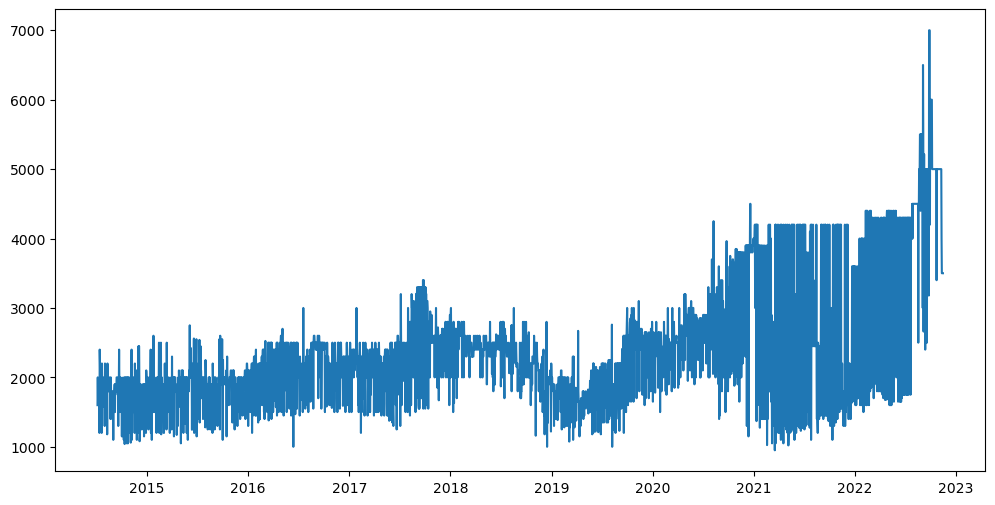

In [21]:
# Step 7: Monitor and Refine
# Monitor performance against actual data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Actual')
plt.plot(forecasted_data.index, forecasted_data, label='Forecast')
plt.legend(loc='best')
plt.title('Actual vs Forecasted Prices')
plt.show()

# Optionally, retrain or adjust model based on new data or model performance


TypeError: unhashable type: 'numpy.ndarray'

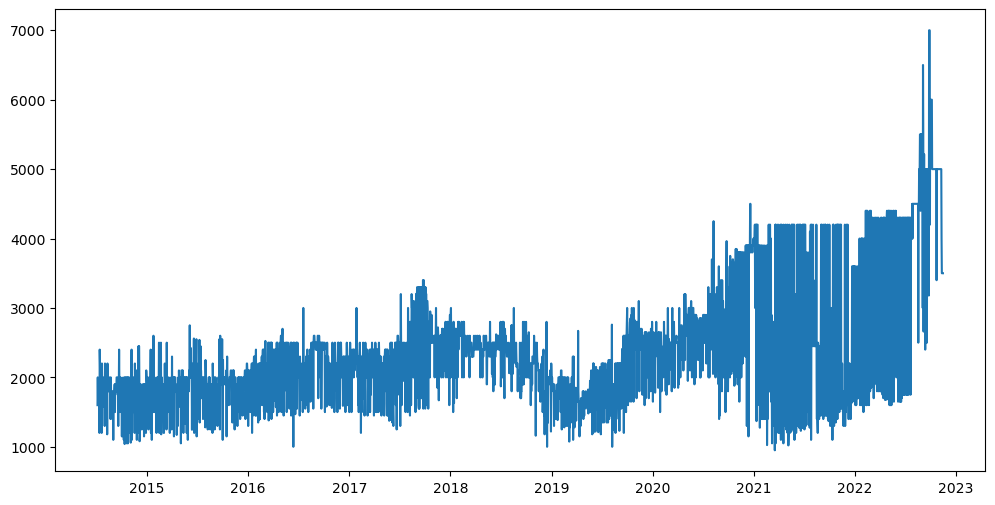

In [23]:
import matplotlib.pyplot as plt

# Assuming data and forecasted_data are pandas DataFrames/Series with datetime indices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Actual')
plt.plot(forecasted_data.index, forecasted_data.values, label='Forecast')  # Use .values to access the values from the Series
plt.legend(loc='best')
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
forecasted_data.index = pd.to_datetime(forecasted_data.index)
